In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from statsmodels.tools.eval_measures import rmse

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
# Here we are importing dataset by using pandas
data = pd.read_csv('uber[1].csv')

In [3]:
# always create a copy 
df = data.copy()
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

## EDA

In [8]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [10]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [11]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [12]:
df.drop(['pickup_datetime'],axis=1,inplace=True)

#### Missing vals Imputation

In [13]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [14]:
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].median())


In [15]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,200000.0,-72.525299,13.117375,-3356.666300,-73.991407,-73.980093,-73.963659,1153.572603
dropoff_latitude,200000.0,39.923895,6.794812,-881.985513,40.733824,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000
hour,200000.0,13.491335,6.515531,0.000000,9.000000,14.000000,19.000000,23.000000
day,200000.0,15.704670,8.687409,1.000000,8.000000,16.000000,23.000000,31.000000
month,200000.0,6.281795,3.438925,1.000000,3.000000,6.000000,9.000000,12.000000
year,200000.0,2011.742440,1.856397,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


#### Here we are going to use Heversine formula to calculate the distance between two points and journey, using the longitude and latitude values.
### Heversine formula
##### hav(θ) = sin**2(θ/2).

In [17]:
from math import *

In [18]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [19]:
df['dist_travel_km'] = np.round(distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              ),2)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.46
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.48


In [21]:
df.dtypes ## Now,there are no categorical variables

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dist_travel_km       float64
dtype: object

### Outlier Detection

- If the outliers are not removed, the model accuracy may decrease. Let us detect the extreme values in the data.
- Fare column has negative values we'll remove them, fare can't be negative.
- Trips where 90 < latitude < -90, 180 < longitude < -180
#### Let's analysis outliers with help of Boxplot

<Axes: >

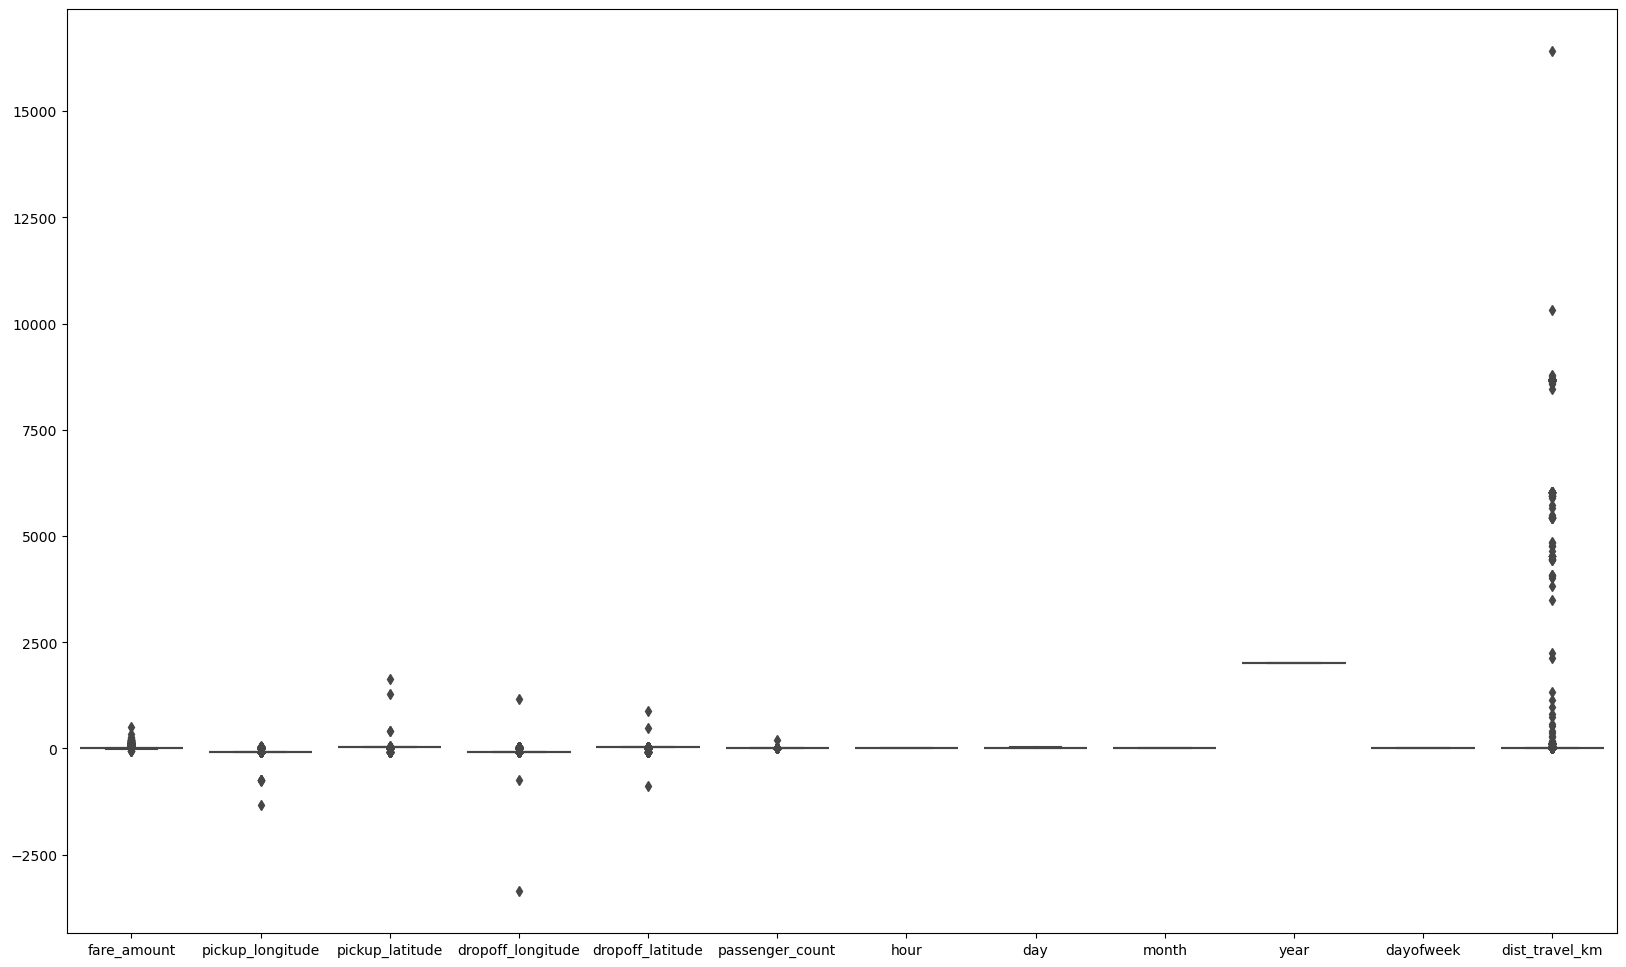

In [22]:
plt.figure(figsize=(20,12))
sns.boxplot(df)

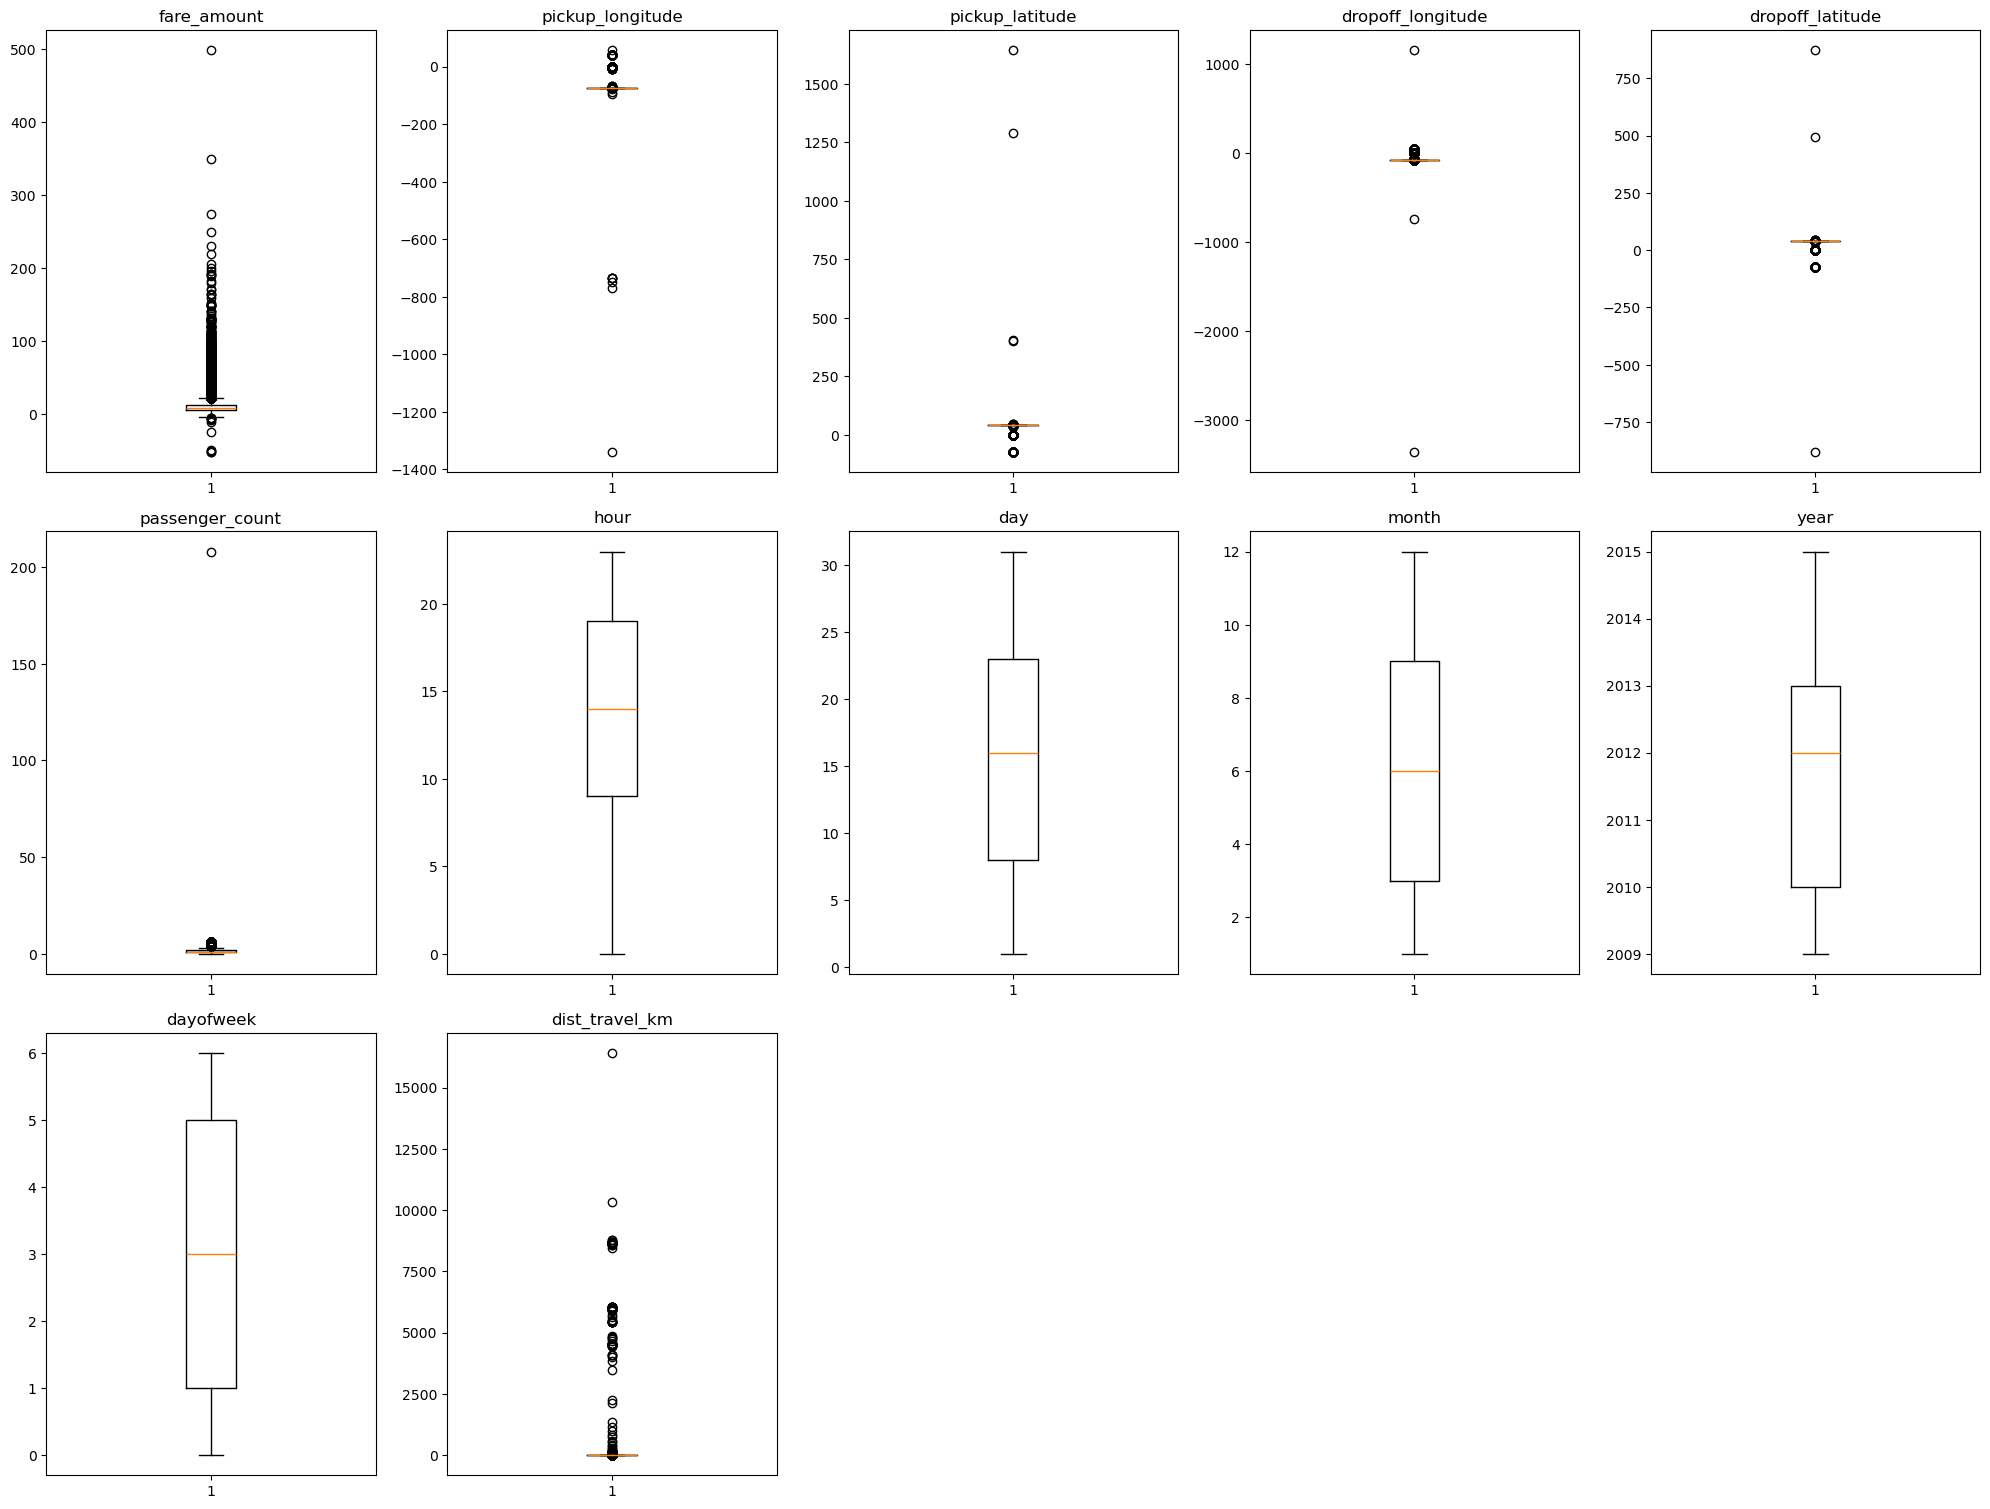

In [23]:
# outliers detection using boxplot
plt.figure(figsize =(20, 30))

for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [24]:
#We will only keep the observation where fare is greater than 0
df = df.loc[(df.fare_amount >= 0)]
print(df.shape)

(199983, 12)


#### Outlier removal using IQR method

In [25]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [26]:
df = treat_outliers_all(df , df.iloc[: , 0::])

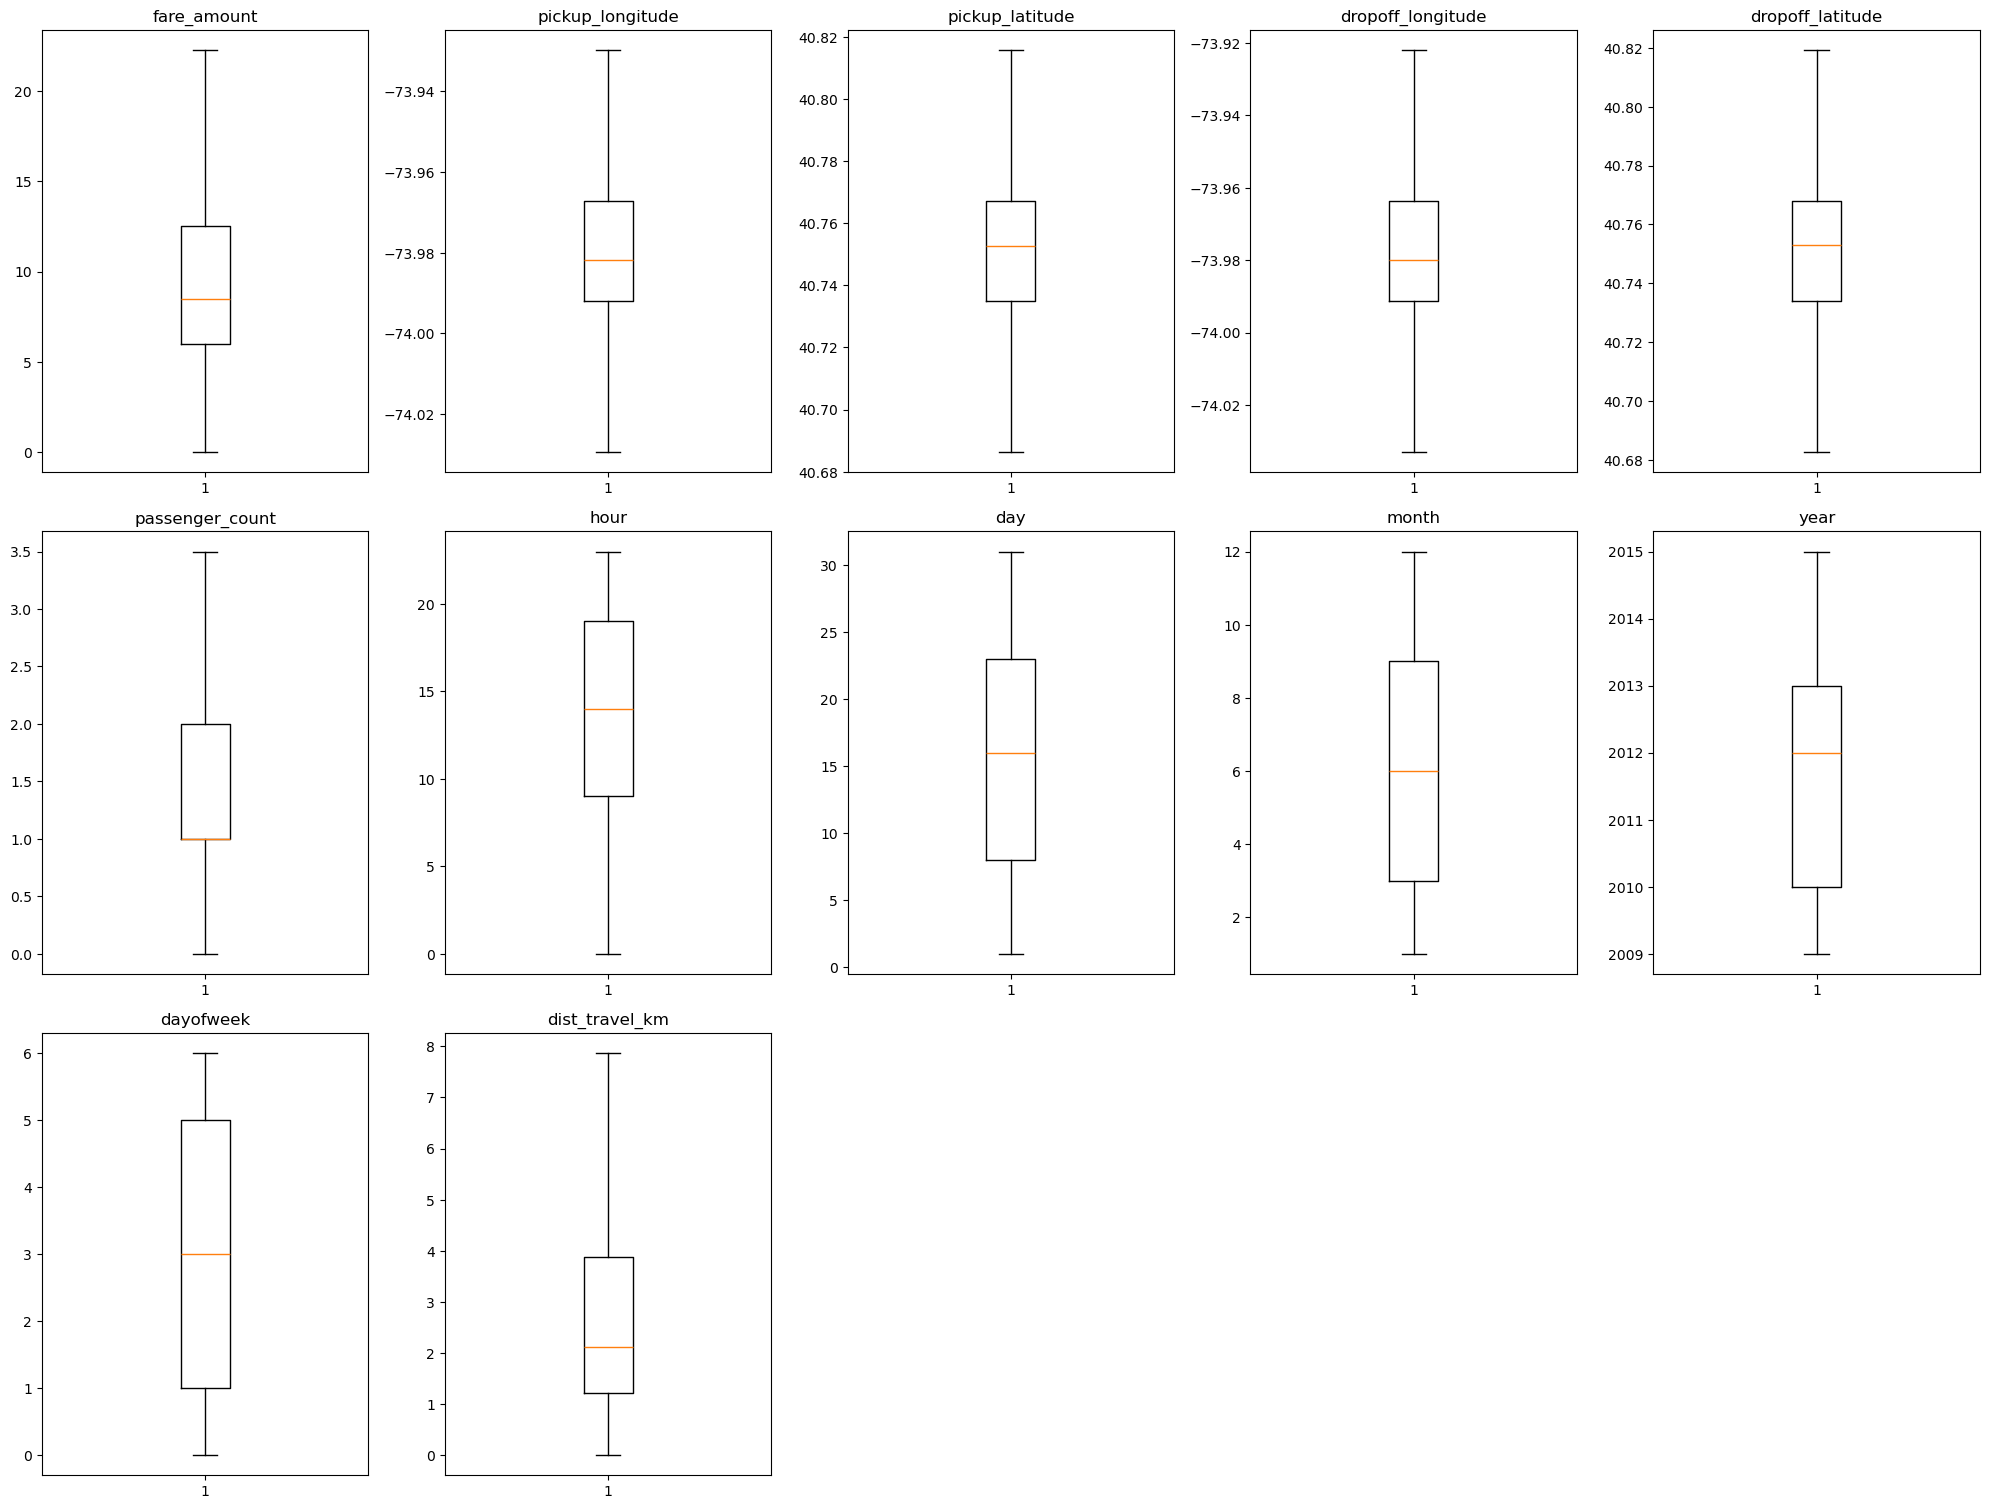

In [27]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [28]:
df.shape

(199983, 12)

##### Remove the observations with travel distance more than 130 kms.As seen from descriptive stats there are obs with travel distance more than 130 km, as that is the limit for trips.

In [29]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [30]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [31]:
df.shape

(199983, 12)

### correlation
-  This allows us to see which variables are correlated.

In [32]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154131,-0.110889,0.218709,-0.125933,0.015882,-0.023607,0.004443,0.030640,0.141429,0.013604,0.844597
pickup_longitude,0.154131,1.000000,0.259520,0.425632,0.073295,-0.013242,0.011585,-0.003201,0.001186,0.010276,-0.024638,0.098130
pickup_latitude,-0.110889,0.259520,1.000000,0.048864,0.515749,-0.012881,0.029683,-0.001531,0.001565,-0.014228,-0.042307,-0.046837
dropoff_longitude,0.218709,0.425632,0.048864,1.000000,0.245685,-0.009312,-0.046589,-0.004021,0.002389,0.011367,-0.003305,0.186597
dropoff_latitude,-0.125933,0.073295,0.515749,0.245685,1.000000,-0.006295,0.019760,-0.003475,-0.001194,-0.009545,-0.031924,-0.038862
passenger_count,0.015882,-0.013242,-0.012881,-0.009312,-0.006295,1.000000,0.020280,0.002699,0.010399,-0.009736,0.048566,0.009674
hour,-0.023607,0.011585,0.029683,-0.046589,0.019760,0.020280,1.000000,0.004683,-0.003906,0.002135,-0.086934,-0.038357
day,0.004443,-0.003201,-0.001531,-0.004021,-0.003475,0.002699,0.004683,1.000000,-0.017382,-0.012133,0.005625,0.003027
month,0.030640,0.001186,0.001565,0.002389,-0.001194,0.010399,-0.003906,-0.017382,1.000000,-0.115862,-0.008815,0.011613
year,0.141429,0.010276,-0.014228,0.011367,-0.009545,-0.009736,0.002135,-0.012133,-0.115862,1.000000,0.006097,0.024336


###### 1. The above plot shows that there is highest positive correlation (= 0.83) between the variables 'longitude_of_pickup' and 'longitude_of_dropoff'.Also there is strong positive correlation between the pair latitude_of_pickup and latitude_of_dropoff.
###### 2. Following variable pairs have strong negative correlation in the dataset(longitude_of_pickup,latitude_of_pickup), (latitude_of_dropoff,longitude_of_pickup),(longitude_of_dropoff,latitude_of_pickup) and (longitude_of_dropoff, latitude_of_dropoff).


#### we are going to check the peak hours during weekdays

**1.Weekdays**

**2.Weekends**

**# Plot a countplot to check the peak hours during weekdays**

<Axes: title={'center': 'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

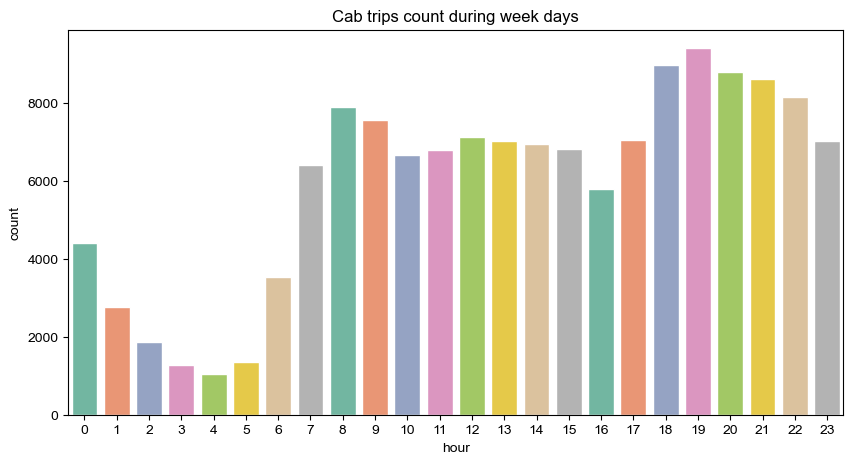

In [33]:
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("ticks")
#plot the countplot for weekdays
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)], palette='Set2')

**# Plot a countplot to check the peak hours during weekends**

<Axes: title={'center': 'Cab trips count during weekends'}, xlabel='hour', ylabel='count'>

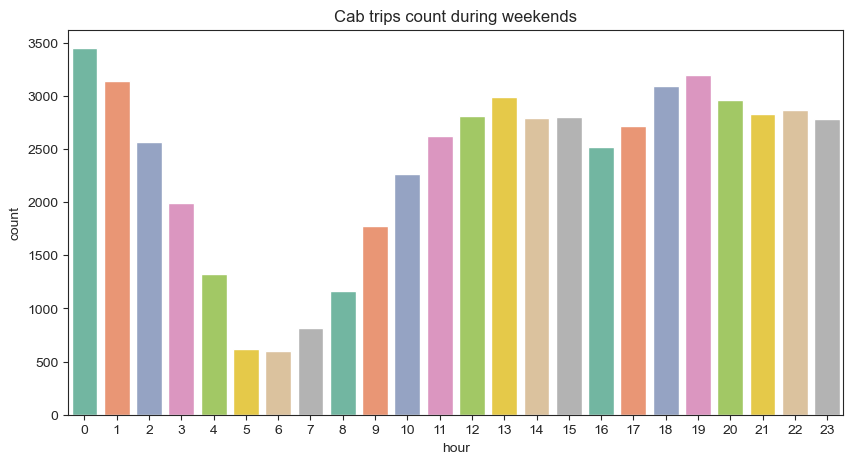

In [34]:
plt.figure(figsize=(10,5))
plt.title('Cab trips count during weekends')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)], palette='Set2')

From the above plot, we can notice that the pattern for demand of Cab is different for weekdays and weekends.

In [35]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

### Linear Regression Assumptions
#### - Multicollinearity

In [72]:
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
         'passenger_count',  'day', 'hour','month', 'year', 'dayofweek', 'dist_travel_km']]
target = df['fare_amount']

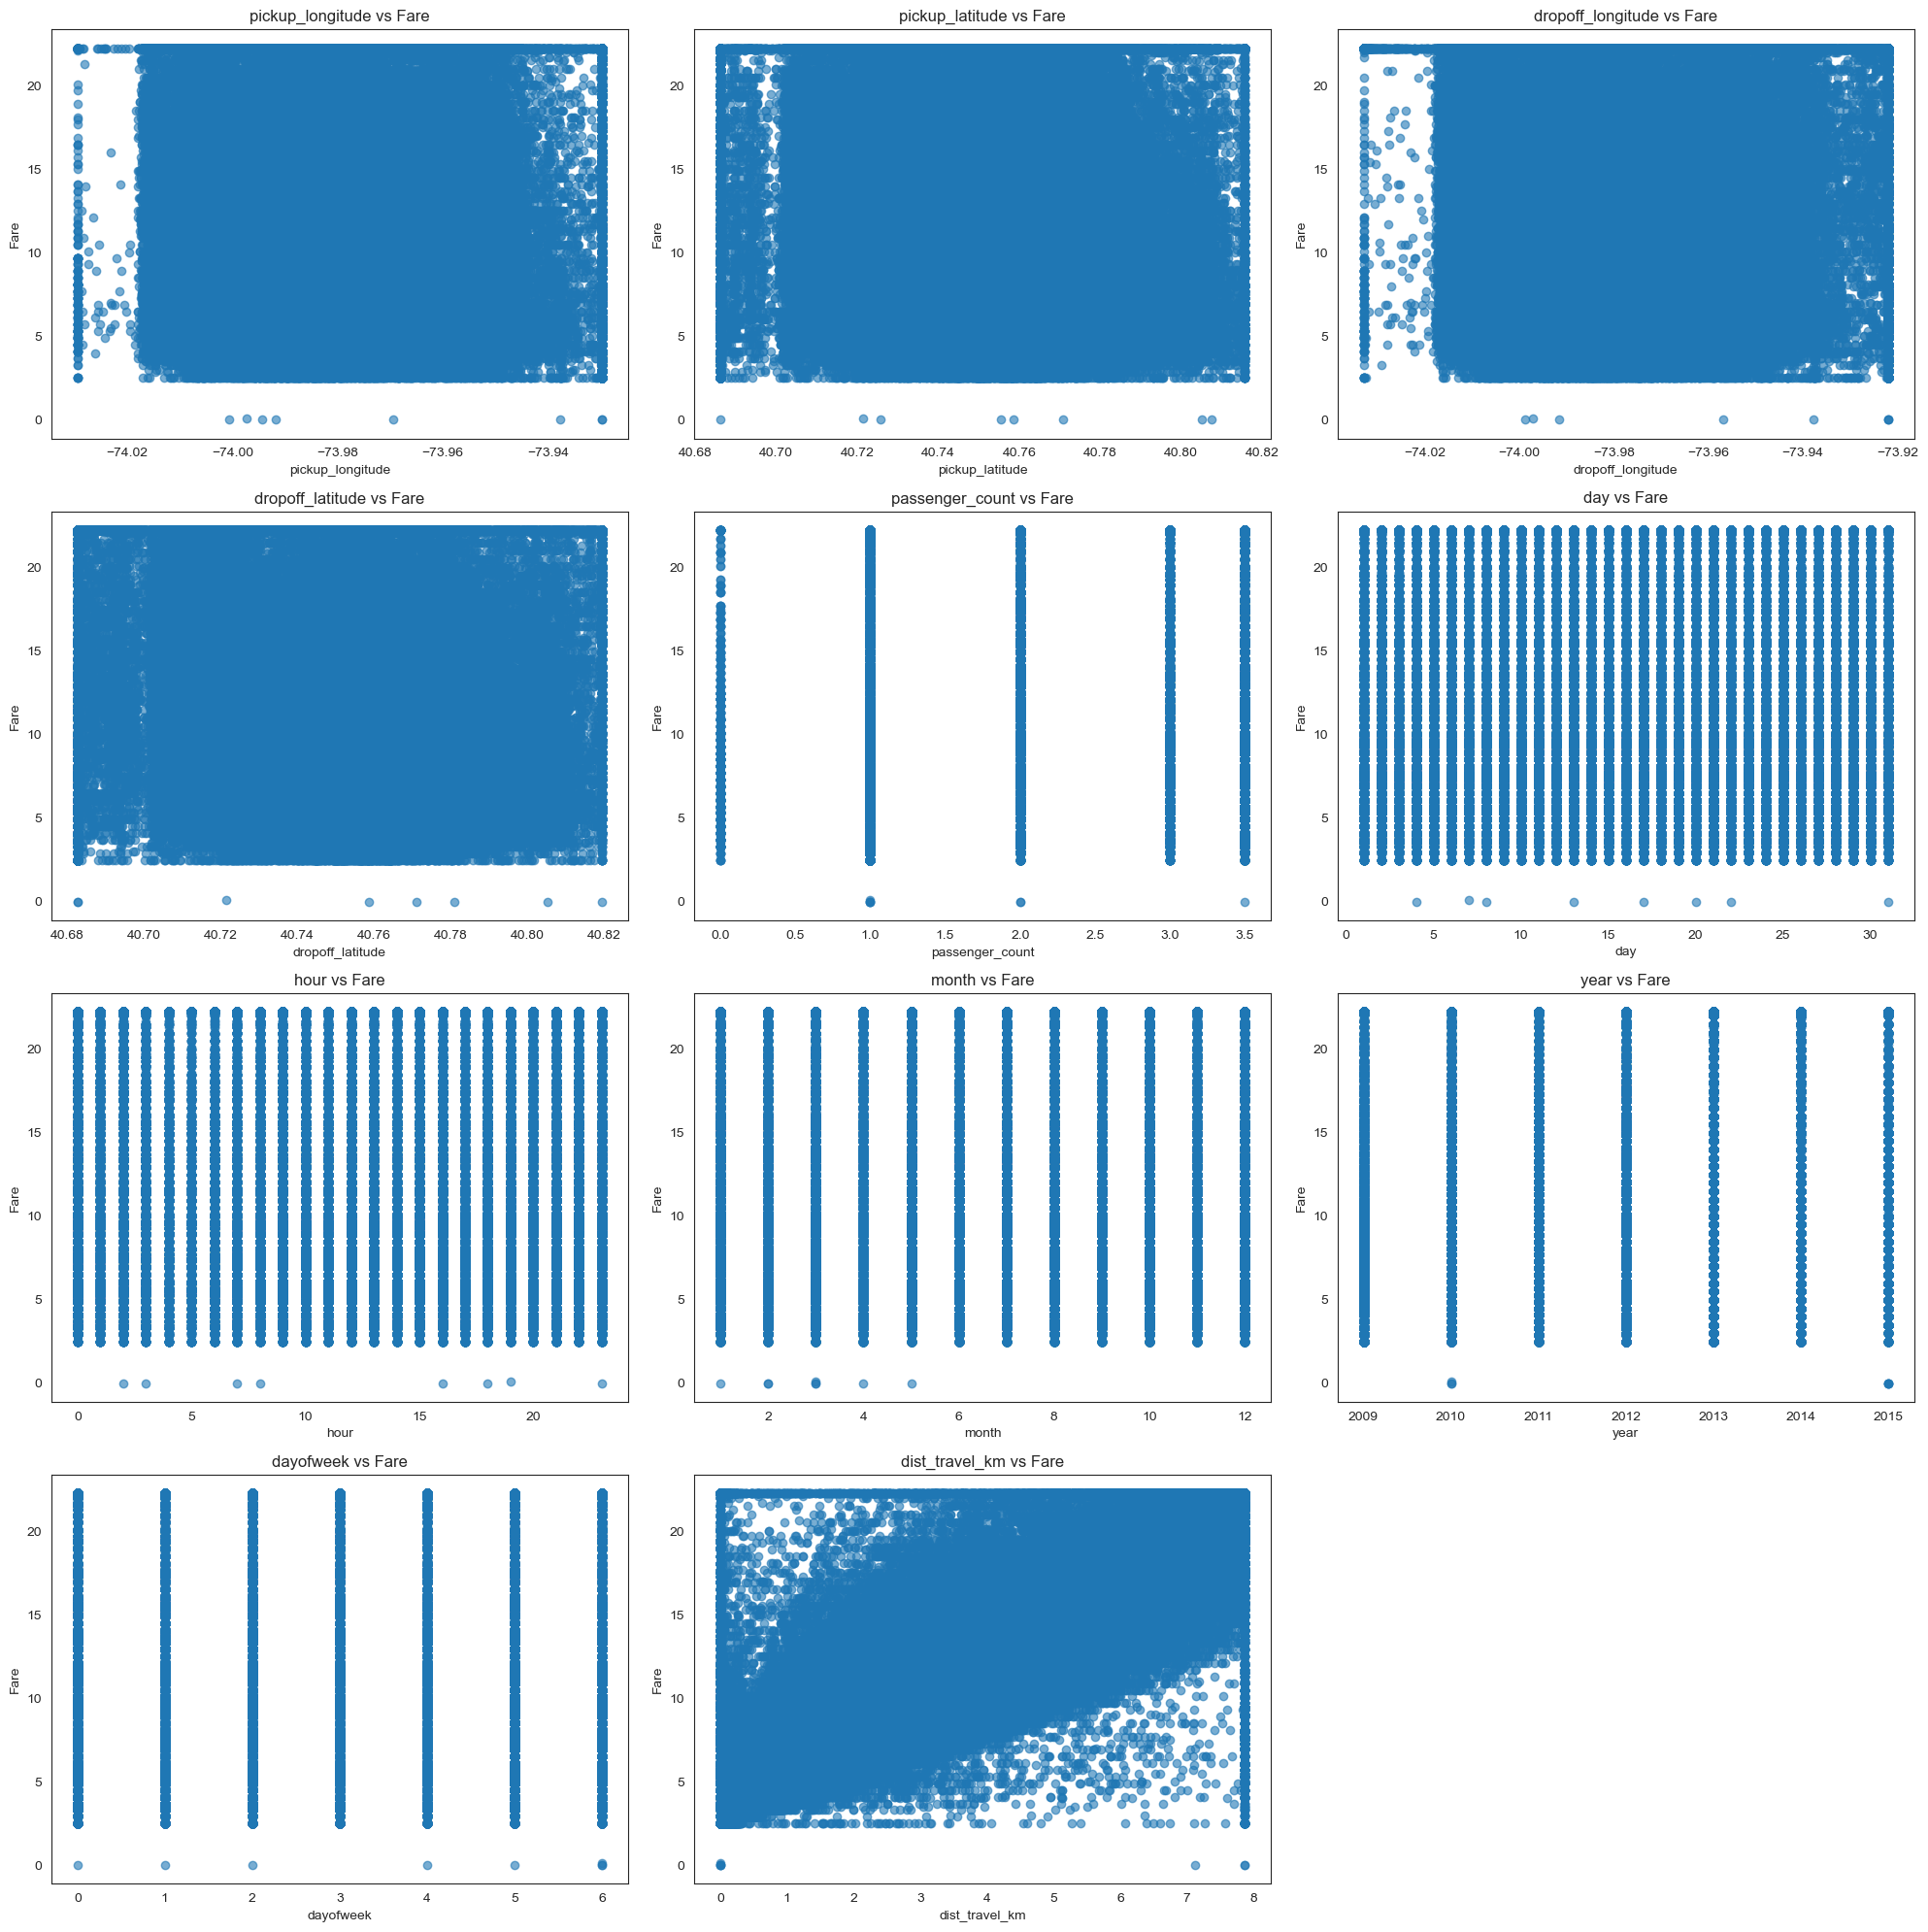

In [65]:
plt.figure(figsize=(20, 20))

# Loop through each feature and plot against fare
for i, col in enumerate(features.columns):
    plt.subplot(4, 3, i + 1)  # 3 rows, 4 columns
    plt.scatter(features[col], target, alpha=0.6)
    plt.title(f'{col} vs Fare')
    plt.xlabel(col)
    plt.ylabel('Fare')

plt.tight_layout()
plt.show()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(features.shape[1]):
    vif.append(variance_inflation_factor(features,i))

In [79]:
df.shape[1]

12

In [81]:
pd.DataFrame({'vif':vif},index=features.columns).T

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,dayofweek,dist_travel_km
vif,1.255534e+07,3.531271e+06,1.234846e+07,2.967229e+06,3.997611,4.270648,5.354637,4.396247,1.128943e+06,3.495734,2.691735


###### In 'hour' col the vif is more than 5, so I have to remove this col and again I'll check the vif  

In [82]:
features.drop(['hour'],axis=1,inplace = True)

C:\Users\web\AppData\Local\Temp\ipykernel_15352\4003589219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(['hour'],axis=1,inplace = True)


In [83]:
features.shape[1]

10

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = []

for i in range(features.shape[1]):
    vif2.append(variance_inflation_factor(features,i))

In [88]:
pd.DataFrame({'vif2':vif2},index=features.columns).T

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek,dist_travel_km
vif2,1.251983e+07,3.531229e+06,1.231955e+07,2.966384e+06,3.995084,4.270535,4.396154,1.128939e+06,3.470006,2.689169


##### The Problem of Multicollinearity resolved as no coln has vif >= 5

### Model

#### 1. Split the data into features and target dataframes

In [140]:
X = features
y = pd.DataFrame(df['fare_amount'])

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','dist_travel_km']])

In [142]:
X.shape

(199983, 10)

In [143]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,7,5,2015,3,1.68
1,-73.994355,40.728225,-73.994710,40.750325,1.0,17,7,2009,4,2.46
2,-74.005043,40.740770,-73.962565,40.772647,1.0,24,8,2009,0,5.04
3,-73.976124,40.790844,-73.965316,40.803349,3.0,26,6,2009,4,1.66
4,-73.929788,40.744085,-73.973082,40.761247,3.5,28,8,2014,3,4.48


In [144]:
X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,dayofweek,dist_travel_km
count,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000,199983.000000
mean,-73.978310,40.750196,-73.976192,40.750151,1.514334,15.704990,6.282049,2011.742363,3.048464,2.854610
std,0.020508,0.025659,0.022880,0.028660,0.876698,8.687489,3.438939,1.856315,1.946970,2.224609
min,-74.029431,40.686252,-74.033030,40.682559,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,-73.992065,40.734796,-73.991407,40.733824,1.000000,8.000000,3.000000,2010.000000,1.000000,1.220000
50%,-73.981823,40.752592,-73.980092,40.753042,1.000000,16.000000,6.000000,2012.000000,3.000000,2.120000
75%,-73.967154,40.767158,-73.963658,40.768001,2.000000,23.000000,9.000000,2013.000000,5.000000,3.880000
max,-73.929788,40.815702,-73.922034,40.819266,3.500000,31.000000,12.000000,2015.000000,6.000000,7.870000


#### 2. Split the data into training and test setss

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42 )
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (159986, 5)
The shape of X_test is: (39997, 5)
The shape of y_train is: (159986, 1)
The shape of y_test is: (39997, 1)


### Multiple Linear Regression

In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [147]:
y_pred = lr.predict(X_test)

In [148]:
# calculate rmse using rmse()
linreg_rmse = rmse(y_test,y_pred )
print('linreg_rmse',linreg_rmse)
# calculate R-squared using rsquared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_pred )
print('r2_score',r_squared)

linreg_rmse [2.79285379]
r2_score 0.7351978809491155


#### residuals

In [154]:
residual = y_pred - y_test
residual.head(5)

,fare_amount
50556,-2.060733
72948,-3.326887
167805,0.906714
120577,0.002234
112820,-0.092492


C:\Users\web\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

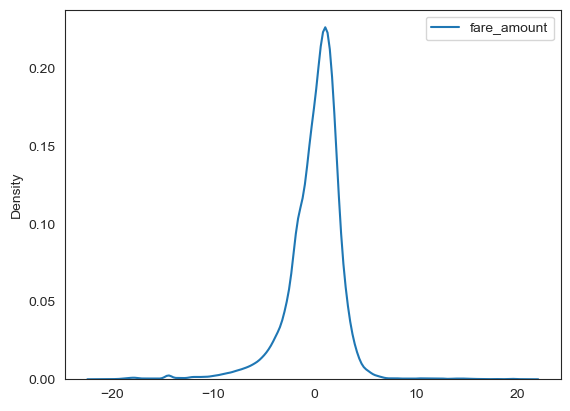

In [150]:
sns.kdeplot(residual)

In [151]:
e = residual.values.flatten()

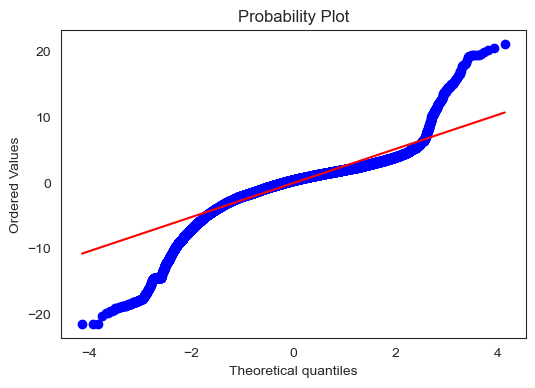

In [152]:
## QQ plot 
import scipy as sp
fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(e,plot=ax,fit=True)

plt.show()

### Ridge Regression

In [153]:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha=0.1,solver="auto")
rid_reg.fit(X_train,y_train)
y_pred1 = rid_reg.predict(X_test)
print("r2_score : ",r2_score(y_pred1,y_test))
print("rmse : ",rmse(y_pred1,y_test))

r2_score :  0.6399091502149763
rmse :  [2.79285379]


In [320]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}


In [321]:
grid_search = GridSearchCV(estimator=rid_reg, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [322]:
grid_search.fit(x_train, y_train)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [323]:
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters found:  {'alpha': 0.1, 'solver': 'auto'}


In [326]:
y_pred = best_model.predict(x_test)

# Evaluate the model
rmse = rmse(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(rmse,r_squared)

[2.79579983] 0.7344255367374554


## Lasso

In [331]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001,max_iter = 2000)
lasso_reg.fit(x_train,y_train)
y_pred2 = lasso_reg.predict(x_test)
print("r2_score : ",r2_score(y_pred2,y_test))
print("rmse: ",rmse(y_test, y_pred))

r2_score :  0.6379607599996246
rmse:  [2.79579983]


In [312]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strengths
    'max_iter': [1000, 2000]  # Number of iterations for convergence
}
grid_search = GridSearchCV(estimator=lasso_reg, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [314]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001, max_iter=2000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'max_iter': [1000, 2000]},
             scoring='neg_mean_squared_error', verbose=2)

In [316]:
y_pred = best_model.predict(x_test)

r_squared = r2_score(y_test, y_pred)
print(rmse,r_squared)

[2.79579983] 0.7344255367374554
